<div align="center"> <h1>Overfitting in Regression</h1>
    <h2><a href="...">Richard Leibrandt</a></h2>
</div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import altair as alt

In [2]:
alt.data_transformers.disable_max_rows()
pd.set_option('display.width', 700)
pd.options.display.max_colwidth = 100
np.set_printoptions(linewidth=800)
np.set_printoptions(edgeitems=20)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
x_train = np.linspace(1, 100, 10)[:, np.newaxis]
y_train = np.log(x_train)

x_test = np.linspace(1, 100, 1000)[:, np.newaxis]

# We build a linear model...

y_linear = LinearRegression().fit(x_train, y_train).predict(x_test)

# ...and a Gaussian Process Modell with large bandwidth...

kernel = 1.0 * RBF(length_scale=50.0, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
y_gauss_proc_goodfit = GaussianProcessRegressor(kernel=kernel).fit(x_train, y_train).predict(x_test)

# ...and a Gaussian Process Modell with small bandwidth

y_gauss_proc_overfit = GaussianProcessRegressor().fit(x_train, y_train).predict(x_test)

In [4]:
# ...and plot the results:

df_plot = pd.DataFrame({'x': np.concatenate((x_train, x_test, x_test, x_test), axis=0).squeeze(),
                        'y': np.concatenate((y_train, y_linear, y_gauss_proc_goodfit, y_gauss_proc_overfit), axis=0).squeeze(),
                        'c': x_train.shape[0] * ['train'] + x_test.shape[0] * ['linear'] + x_test.shape[0] * ['gauss_proc_goodfit'] + x_test.shape[0] * ['gauss_proc_overfit']})

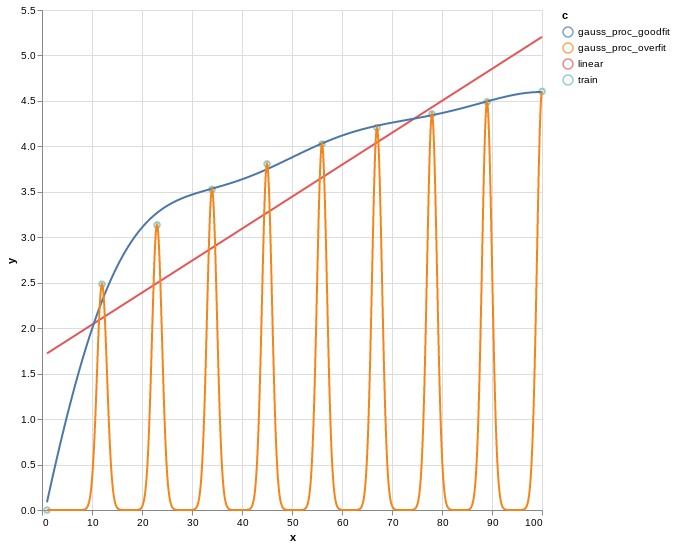

In [5]:
# VISUALISATION
alt.renderers.enable('mimetype')
alt.Chart(df_plot.query("c == 'train'")). \
 properties(height=500, width=500). \
 mark_point(). \
 encode(x='x',
        y='y',
        color='c') + alt.Chart(df_plot.query("c != 'train'")). \
 properties(height=500, width=500). \
 mark_line(). \
 encode(x='x',
        y='y',
        color='c')

How to do hyperparameter-tuning: https://scikit-learn.org/stable/modules/cross_validation.html